<a href="https://colab.research.google.com/github/violetjzt/STQD6324-P150177/blob/main/Fake_and_Real_News_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake and Real News Analysis**

# **Data Cleaning and Preparation**

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
fake_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fake.csv',on_bad_lines='skip', engine='python')
true_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/True.csv',on_bad_lines='skip', engine='python')

In [ ]:
print("Fake News Dataset Info:")
print(fake_df.info())
print("\nTrue News Dataset Info:")
print(true_df.info())

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [ ]:
# Add a label column for classification
fake_df['label'] = 0
true_df['label'] = 1

In [ ]:
# Add a source column for clarity
fake_df['source'] = 'fake'
true_df['source'] = 'true'

In [ ]:
# Merge the datasets
news_df = pd.concat([fake_df, true_df], ignore_index=True)

In [ ]:
# Shuffle the dataset to mix fake and real news
news_df = news_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Checking for duplicates and missing values
print(f"Total Duplicates: {news_df.duplicated().sum()}")
news_df.drop_duplicates(inplace=True)
print(f"Total Missing Values: \n{news_df.isnull().sum()}")

Total Duplicates: 0
Total Missing Values: 
title      0
text       0
subject    0
date       0
label      0
source     0
dtype: int64


In [ ]:
# Standardizing text data
news_df['text'] = news_df['text'].str.lower()
news_df['text'] = news_df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [ ]:
print("Cleaned DataFrame:")
print(news_df.head())
print(news_df.describe())

Cleaned DataFrame:
                                               title  \
0      Conservatives attack proposed U.S. border tax   
1   America Laughs At Melania Trump For Hypocriti...   
2  Trump's blocking of Twitter users violates U.S...   
3   WATCH: Powerful Video PERFECTLY Explains How ...   
4   Anti-Gay Pastor Who Cheered Killing Of Pulse ...   

                                                text       subject  \
0  washington reuters  conservative activist grou...  politicsNews   
1  as her husband continues to bully people on tw...          News   
2  washington reuters  a freespeech institute on ...  politicsNews   
3  one of the greatest strategies to gain and hol...          News   
4  this hypocrite just got his ass handed to him ...          News   

               date  label source  
0    April 6, 2017       1   true  
1  November 3, 2016      0   fake  
2     June 6, 2017       1   true  
3    March 13, 2016      0   fake  
4   August 26, 2016      0   fake  
       

In [ ]:
# Save the cleaned dataset
news_df.to_csv('Cleaned_News_Dataset.csv', index=False, encoding='utf-8', sep=',')

# **Insights and Explanations--Text Analysis Python Part Ⅰ**

In [ ]:
from collections import Counter
import re

In [ ]:
# Average headline length (in characters) by news type
headline_length = news_df.groupby('source')['title'].apply(lambda x: x.str.len().mean())
print("Average Headline Length:\n", headline_length)

# Average body text length (in characters) by news type
body_length = news_df.groupby('source')['text'].apply(lambda x: x.str.len().mean())
print("\nAverage Body Text Length:\n", body_length)


Average Headline Length:
 source
fake    94.194054
true    64.658291
Name: title, dtype: float64

Average Body Text Length:
 source
fake    2488.619601
true    2319.029796
Name: text, dtype: float64


In [ ]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', format='%B %d, %Y')

# month nalysis
news_df['year_month'] = news_df['date'].dt.to_period('M')
monthly_pattern = news_df.groupby(['year_month', 'source']).size().reset_index(name='count')
print("\nPublishing Patterns by Month:\n", monthly_pattern)

# week analysis
day_pattern = news_df.groupby([news_df['date'].dt.day_name(), 'source']).size().reset_index(name='count')
print("\nPublishing Patterns by Day of the Week:\n", day_pattern)



Publishing Patterns by Month:
    year_month source  count
0     2015-05   fake    338
1     2016-01   fake    695
2     2016-02   fake    687
3     2016-03   fake    679
4     2016-04   fake    610
5     2016-05   fake   1012
6     2016-06   fake    477
7     2016-07   fake    465
8     2016-08   fake    438
9     2016-09   fake    486
10    2016-10   fake    519
11    2016-11   fake    513
12    2016-12   fake    496
13    2017-01   fake    580
14    2017-02   fake    467
15    2017-03   fake    541
16    2017-04   fake    362
17    2017-05   fake    827
18    2017-06   fake    399
19    2017-07   fake    312
20    2017-08   fake    313
21    2017-09   fake    227
22    2017-10   fake    199
23    2017-11   fake    142
24    2017-12   fake     84

Publishing Patterns by Day of the Week:
         date source  count
0     Friday   fake   1777
1     Monday   fake   1620
2   Saturday   fake   1460
3     Sunday   fake   1558
4   Thursday   fake   1860
5    Tuesday   fake   1764
6  Wednes

In [ ]:
# true/fake news subject bias analysis
subject_bias = news_df.groupby(['subject', 'source']).size().reset_index(name='count')

true_subject_bias = subject_bias[subject_bias['source'] == 'true'].sort_values(by='count', ascending=False)
fake_subject_bias = subject_bias[subject_bias['source'] == 'fake'].sort_values(by='count', ascending=False)

true_subject_bias.reset_index(drop=True, inplace=True)
fake_subject_bias.reset_index(drop=True, inplace=True)

print("\n🔹 True News Distribution by Subject:\n", true_subject_bias)
print("\n🔹 Fake News Distribution by Subject:\n", fake_subject_bias)


🔹 True News Distribution by Subject:
         subject source  count
0  politicsNews   true  11220
1     worldnews   true   9991

🔹 Fake News Distribution by Subject:
            subject source  count
0             News   fake   9050
1         politics   fake   6838
2        left-news   fake   4459
3  Government News   fake   1570
4          US_News   fake    783
5      Middle-east   fake    778


# **Insights and Explanations--Text Analysis Python Part Ⅱ**

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def get_top_words(text_series, top_n=10):
    words = text_series.str.cat(sep=' ').lower()
    words = re.findall(r'\w+', words)
    return Counter(words).most_common(top_n)

# Top 10 words in fake news titles
fake_top_words = get_top_words(news_df[news_df['source'] == 'fake']['title'])
print("\nTop Words in Fake News Headlines:\n", fake_top_words)

# Top 10 words in true news titles
true_top_words = get_top_words(news_df[news_df['source'] == 'true']['title'])
print("\nTop Words in True News Headlines:\n", true_top_words)


Top Words in Fake News Headlines:
 [('to', 9509), ('trump', 9338), ('video', 8474), ('s', 7712), ('the', 6306), ('of', 5166), ('for', 4833), ('in', 4717), ('a', 3786), ('on', 3688)]

Top Words in True News Headlines:
 [('s', 8326), ('to', 7742), ('trump', 5518), ('u', 4663), ('in', 4613), ('on', 3300), ('of', 2991), ('says', 2962), ('for', 2748), ('with', 1487)]


In [ ]:
fake_news = news_df[news_df['source'] == 'fake']
true_news = news_df[news_df['source'] == 'true']

print(f"Fake News Count: {len(fake_news)}")
print(f"True News Count: {len(true_news)}")

Fake News Count: 23478
True News Count: 21211


In [ ]:
def get_word_frequency(series, top_n=20):
    all_words = ' '.join(series).lower().split()
    filtered_words = [word for word in all_words if word not in stop_words and len(word) > 2]
    word_counter = Counter(filtered_words)
    return word_counter.most_common(top_n)

fake_title_freq = get_word_frequency(fake_news['title'])
true_title_freq = get_word_frequency(true_news['title'])
fake_text_freq = get_word_frequency(fake_news['text'])
true_text_freq = get_word_frequency(true_news['text'])

print("\nFake News Title Word Frequency:\n", fake_title_freq)
print("\nTrue News Title Word Frequency:\n", true_title_freq)
print("\nFake News Text Word Frequency:\n", fake_text_freq)
print("\nTrue News Text Word Frequency:\n", true_text_freq)


Fake News Title Word Frequency:
 [('trump', 6615), ('[video]', 5052), ('(video)', 2543), ('obama', 1645), ('hillary', 1589), ('trump’s', 1450), ('watch:', 1212), ('president', 971), ('clinton', 882), ('new', 877), ('donald', 818), ('black', 806), ('gop', 736), ('white', 735), ('obama’s', 663), ('breaking:', 659), ('watch', 653), ('muslim', 612), ('news', 588), ('media', 572)]

True News Title Word Frequency:
 [('trump', 4363), ('u.s.', 3842), ('says', 2951), ('house', 1381), ('north', 906), ('new', 856), ('white', 802), ('senate', 723), ('russia', 709), ('korea', 685), ('court', 679), ("trump's", 667), ('republican', 623), ('tax', 594), ('bill', 582), ('state', 575), ('china', 560), ('clinton', 526), ('obama', 513), ('vote', 478)]

Fake News Text Word Frequency:
 [('trump', 73421), ('said', 31007), ('people', 25941), ('president', 25494), ('would', 23419), ('one', 22862), ('clinton', 17952), ('obama', 17760), ('like', 17595), ('donald', 17101), ('also', 15221), ('new', 14135), ('news'

In [ ]:
# sentiment analysis
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

fake_news.loc[:, 'title_sentiment'] = fake_news['title'].apply(analyze_sentiment)
fake_news.loc[:, 'text_sentiment'] = fake_news['text'].apply(analyze_sentiment)
true_news.loc[:, 'title_sentiment'] = true_news['title'].apply(analyze_sentiment)
true_news.loc[:, 'text_sentiment'] = true_news['text'].apply(analyze_sentiment)

print("🔹 Fake News Sentiment Analysis (Title):")
print(fake_news[['title', 'title_sentiment']].head())

print("\n🔹 True News Sentiment Analysis (Title):")
print(true_news[['title', 'title_sentiment']].head())

<ipython-input-76-c0b2350e30a7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news.loc[:, 'text_sentiment'] = fake_news['text'].apply(analyze_sentiment)
<ipython-input-76-c0b2350e30a7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news.loc[:, 'title_sentiment'] = true_news['title'].apply(analyze_sentiment)


🔹 Fake News Sentiment Analysis (Title):
                                               title  title_sentiment
1   America Laughs At Melania Trump For Hypocriti...         0.000000
3   WATCH: Powerful Video PERFECTLY Explains How ...         0.433333
4   Anti-Gay Pastor Who Cheered Killing Of Pulse ...         0.000000
6   WATCH: Bill Maher Explains How Republicans Ge...        -1.000000
8  BOOM! Ivanka’s Line Ranked #1 On Amazon Bestse...         0.000000

🔹 True News Sentiment Analysis (Title):
                                                title  title_sentiment
0       Conservatives attack proposed U.S. border tax              0.0
2   Trump's blocking of Twitter users violates U.S...              0.0
5   Louisiana governor says state's finances in di...              0.0
7   Carson signals exit, U.S. Republicans grapple ...              0.0
10  Kremlin says U.S. idea to cut all ties with N....             -0.5


<ipython-input-76-c0b2350e30a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news.loc[:, 'text_sentiment'] = true_news['text'].apply(analyze_sentiment)


In [ ]:
print("🔹 Fake News Sentiment Analysis (Text):")
print(fake_news[['text', 'text_sentiment']].head())

print("\n🔹 True News Sentiment Analysis (Text):")
print(true_news[['text', 'text_sentiment']].head())

🔹 Fake News Sentiment Analysis (Text):
                                                text  text_sentiment
1  as her husband continues to bully people on tw...        0.167777
3  one of the greatest strategies to gain and hol...        0.156145
4  this hypocrite just got his ass handed to him ...        0.023750
6  at some point republicans learned that they ca...        0.213914
8  it seems that with each new retail store that ...        0.158636

🔹 True News Sentiment Analysis (Text):
                                                 text  text_sentiment
0   washington reuters  conservative activist grou...        0.095502
2   washington reuters  a freespeech institute on ...        0.005153
5   reuters  louisiana governor john bel edwards p...        0.089069
7   reuters  retired neurosurgeon ben carson signa...        0.081214
10  moscow reuters  the kremlin said on thursday t...       -0.293056


In [ ]:
# do an average sentiment score
fake_title_sentiment_avg = fake_news['title_sentiment'].mean()
fake_text_sentiment_avg = fake_news['text_sentiment'].mean()

true_title_sentiment_avg = true_news['title_sentiment'].mean()
true_text_sentiment_avg = true_news['text_sentiment'].mean()

print(f"🔹 Fake News - title_sentiment_avg: {fake_title_sentiment_avg:.4f}")
print(f"🔹 Fake News - text_sentiment_avg: {fake_text_sentiment_avg:.4f}")
print(f"\n🔹 True News - title_sentiment_avg: {true_title_sentiment_avg:.4f}")
print(f"🔹 True News - text_sentiment_avg: {true_text_sentiment_avg:.4f}")

🔹 Fake News - title_sentiment_avg: 0.0033
🔹 Fake News - text_sentiment_avg: 0.0591

🔹 True News - title_sentiment_avg: 0.0247
🔹 True News - text_sentiment_avg: 0.0538


# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# do some design
sns.set_theme(style="whitegrid")

In [ ]:
import pandas as pd

length_data = pd.DataFrame({
    'News Type': ['Fake', 'True'],
    'Headline Length': [headline_length['fake'], headline_length['true']],
    'Body Text Length': [body_length['fake'], body_length['true']]
})

print(length_data)

  News Type  Headline Length  Body Text Length
0      Fake        94.194054       2488.619601
1      True        64.658291       2319.029796


<ipython-input-55-e68600375eaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='News Type', y='Headline Length', data=length_data, palette='Blues')
<ipython-input-55-e68600375eaf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='News Type', y='Body Text Length', data=length_data, palette='Greens')


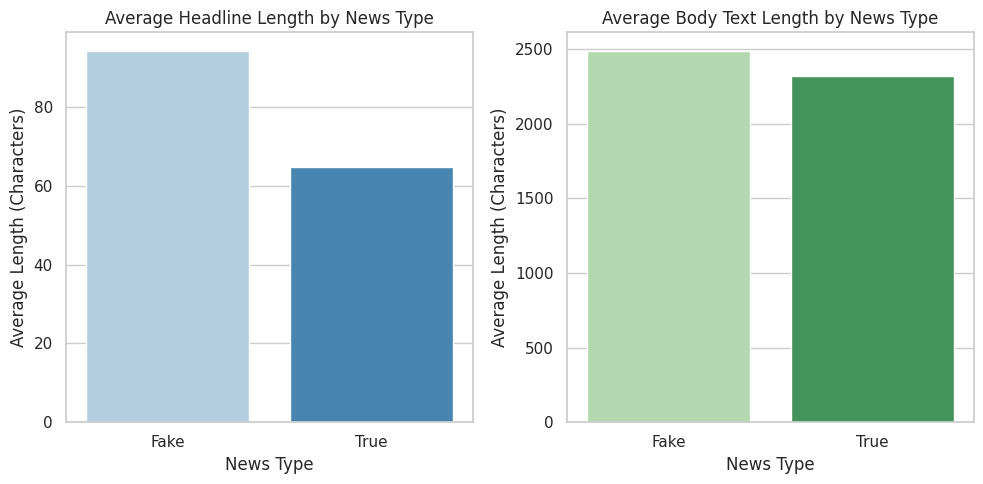

In [ ]:
# Set figure size
plt.figure(figsize=(10, 5))

# Plot average headline length by news type
plt.subplot(1, 2, 1)
sns.barplot(x='News Type', y='Headline Length', data=length_data, palette='Blues')
plt.title('Average Headline Length by News Type')
plt.xlabel('News Type')
plt.ylabel('Average Length (Characters)')

# Plot average body text length by news type
plt.subplot(1, 2, 2)
sns.barplot(x='News Type', y='Body Text Length', data=length_data, palette='Greens')
plt.title('Average Body Text Length by News Type')
plt.xlabel('News Type')
plt.ylabel('Average Length (Characters)')

# Display the plots
plt.tight_layout()
plt.show()

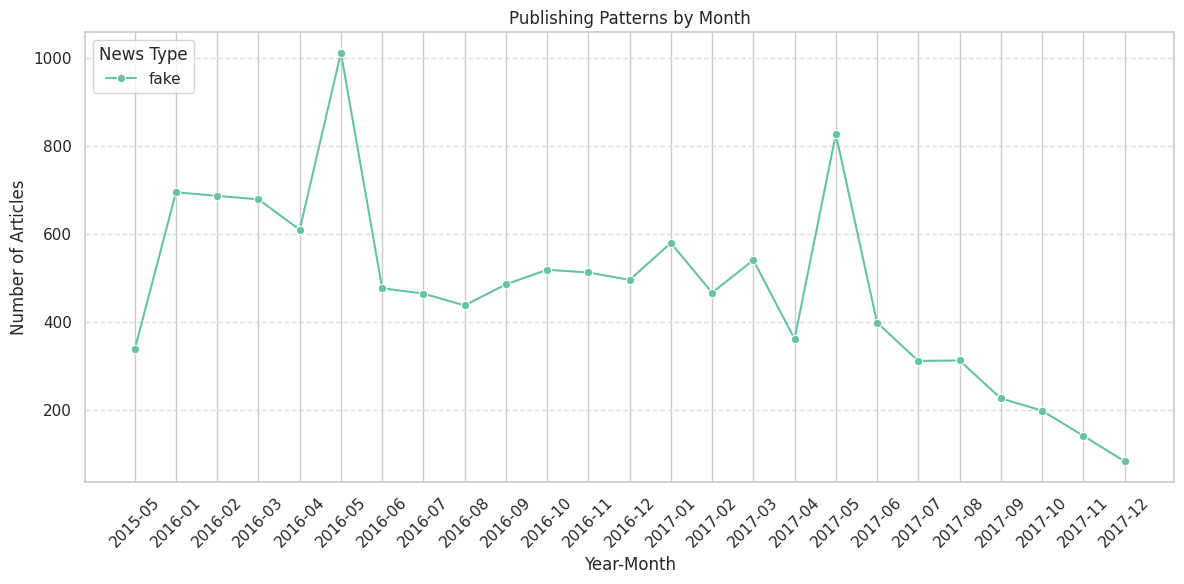

In [ ]:
# Convert 'year_month' to string
monthly_pattern['year_month'] = monthly_pattern['year_month'].astype(str)

# Set figure size
plt.figure(figsize=(12, 6))

# Plot monthly publishing patterns
sns.lineplot(
    data=monthly_pattern,
    x='year_month',
    y='count',
    hue='source',
    marker='o',
    palette='Set2'
)

# Set labels and titles
plt.title('Publishing Patterns by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.legend(title='News Type', loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

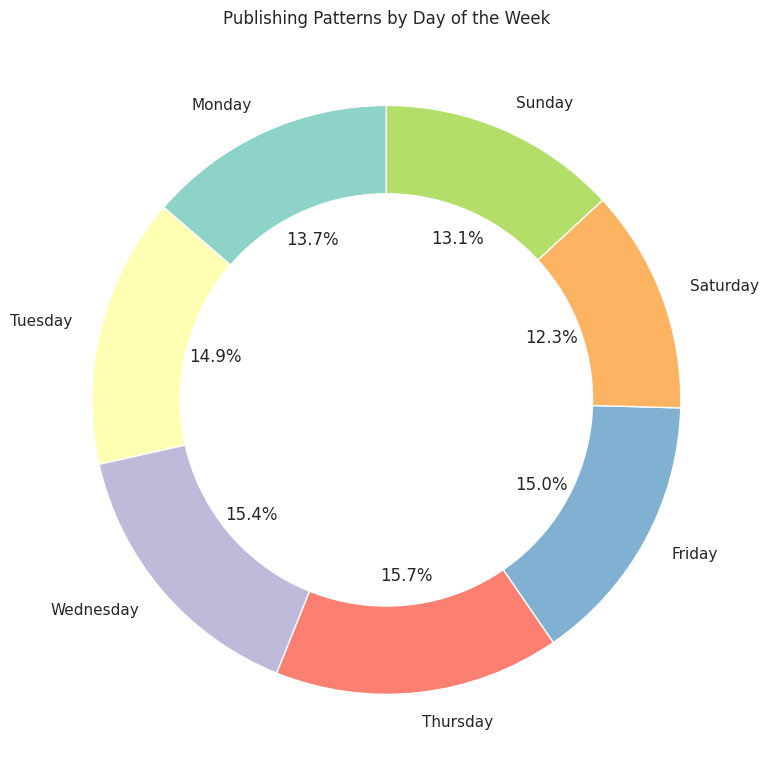

In [ ]:
# Extract the day name from the date column
news_df['day_name'] = news_df['date'].dt.day_name()

# Group by the extracted day name and source, then aggregate the counts
day_pattern = news_df.groupby(['day_name', 'source']).size().reset_index(name='count')

# Aggregating by day of the week
day_pattern_aggregated = day_pattern.groupby('day_name')['count'].sum().reset_index()

# Sorting the days for proper visualization
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_pattern_aggregated['day_name'] = pd.Categorical(day_pattern_aggregated['day_name'], categories=days_of_week, ordered=True)
day_pattern_aggregated = day_pattern_aggregated.sort_values('day_name')

# Set the figure size
plt.figure(figsize=(8, 8))

# Plotting the donut chart
plt.pie(day_pattern_aggregated['count'], labels=day_pattern_aggregated['day_name'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', 7))

# Draw a white circle at the center to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Publishing Patterns by Day of the Week')
plt.tight_layout()

# Show the plot
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 Words in Fake News Titles (Without Stopwords, Punctuation & After Stemming): [('video', 8370), ('trump', 7050), ('watch', 1939), ('obama', 1767), ('hillari', 1706), ('new', 1600), ('trump’', 1484), ('presid', 1122), ('break', 1025), ('us', 1005)]


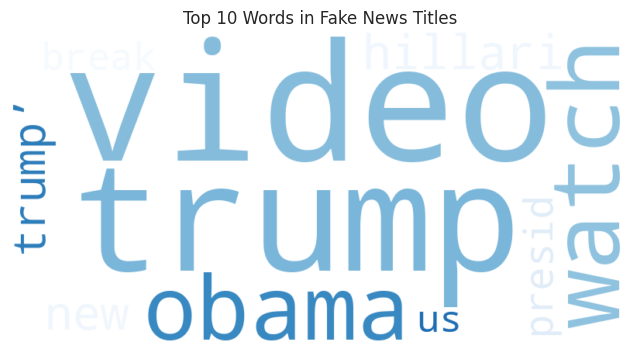

In [ ]:
# word cloud: Top 10 words in fake news titles
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Combine all fake news titles into one large string
fake_titles = ' '.join(fake_news['title'].dropna().tolist())

# Remove punctuation
fake_titles = fake_titles.translate(str.maketrans('', '', string.punctuation))

# Tokenize, remove stopwords, remove punctuation, and apply stemming
filtered_words = [
    stemmer.stem(word) for word in fake_titles.split()
    if word.lower() not in stop_words
]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)
print("Top 10 Words in Fake News Titles (Without Stopwords, Punctuation & After Stemming):", top_10_words)

# Create a dictionary for word cloud input
word_freq_dict = dict(top_10_words)

# Generate the WordCloud
plt.figure(figsize=(8, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues')
wordcloud.generate_from_frequencies(word_freq_dict)

# Display the WordCloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Words in Fake News Titles')
plt.show()

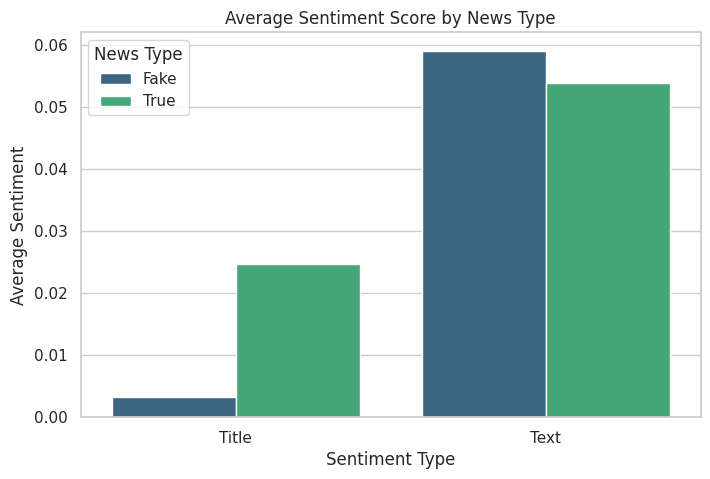

In [ ]:
# visualization of average sentiment score
sentiment_data = pd.DataFrame({
    'News Type': ['Fake', 'Fake', 'True', 'True'],
    'Sentiment Type': ['Title', 'Text', 'Title', 'Text'],
    'Average Sentiment': [
        fake_title_sentiment_avg,
        fake_text_sentiment_avg,
        true_title_sentiment_avg,
        true_text_sentiment_avg
    ]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Sentiment Type', y='Average Sentiment', hue='News Type', data=sentiment_data, palette='viridis')
plt.title('Average Sentiment Score by News Type')
plt.show()